In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [258]:
complaints_path = 'data/allegations_202007271729.csv'
layout_path = 'data/CCRB Data Layout Table.xlsx'
excelList = pd.ExcelFile(layout_path).sheet_names
excelList

['Layout', 'Rank Abbrevs', 'Command Abbrevs', 'FADO', 'Dispositions']

In [259]:
layout = pd.read_excel(layout_path)
police_abbrev = pd.read_excel(layout_path, sheet_name=excelList[1])
complaints = pd.read_csv(complaints_path)
complaints.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [260]:
layout.drop(columns = "glossary")

,field name,description
0,unique_mos_id,"unique ID of the officer (""member of service"")"
1,first_name,Officer's first name
2,last_name,Officer's last name
3,command_now,Officer's command assignment as of July 2020
4,complaint_id,Unique ID of the complaint
5,month_received,Month the complaint was received by CCRB
6,year_received,Year the complaint was received by CCRB
7,month_closed,Month the complaint investigation was closed b...
8,year_closed,Year the complaint investigation was closed by...
9,command_at_incident,Officer's command assignment at the time of th...


In [261]:
complaint_times = complaints[['month_received', 'year_received', 'month_closed', 'year_closed']]
display(complaint_times)
complaint_times.info()

,month_received,year_received,month_closed,year_closed
0,7,2019,5,2020
1,11,2011,8,2012
2,11,2011,8,2012
3,7,2012,9,2013
4,8,2018,2,2019
...,...,...,...,...
33353,8,2016,2,2017
33354,8,2016,2,2017
33355,8,2016,2,2017
33356,8,2016,2,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   month_received  33358 non-null  int64
 1   year_received   33358 non-null  int64
 2   month_closed    33358 non-null  int64
 3   year_closed     33358 non-null  int64
dtypes: int64(4)
memory usage: 1.0 MB


In [262]:
time_labels = [('month_received', 'year_received'), ('month_closed', 'year_closed')]
times = []

for label in time_labels:
    times += [pd.to_datetime(complaint_times[label[0]].apply(lambda month: "0" + str(month) if len(str(month)) == 1 else str(month)) + "/" + complaint_times[label[1]].astype(str), format="%m/%Y")]

complaints = complaints.assign(date_received = times[0]).assign(date_closed = times[1]).drop(columns = complaint_times.columns)

In [263]:
complaints['days_taken'] = (complaints['date_closed'] - complaints['date_received']).dt.days
complaints.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,date_received,date_closed,days_taken
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305
1,10007,John,Sears,078 PCT,5952,24601,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274
2,10007,John,Sears,078 PCT,5952,24601,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274
3,10007,John,Sears,078 PCT,5952,26146,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2012-07-01,2013-09-01,427
4,10009,Noemi,Sierra,078 PCT,24058,40253,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184


In [264]:
complaints['days_taken'].describe()

count    33358.000000
mean       296.268721
std        152.703275
min          0.000000
25%        183.000000
50%        303.000000
75%        396.000000
max       3348.000000
Name: days_taken, dtype: float64

<AxesSubplot:xlabel='days_taken', ylabel='complainant_age_incident'>

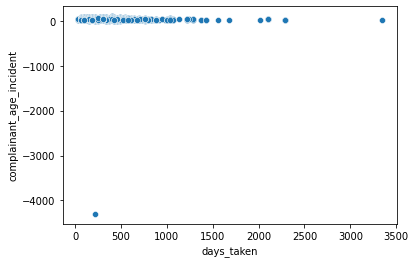

In [265]:
sns.scatterplot(data = complaints, x = complaints['days_taken'], y = 'complainant_age_incident')

In [266]:
complaints[['complainant_age_incident', 'mos_age_incident']].describe()

,complainant_age_incident,mos_age_incident
count,28546.000000,33358.000000
mean,32.484201,32.346873
std,28.408963,6.040944
min,-4301.000000,20.000000
25%,23.000000,28.000000
50%,30.000000,31.000000
75%,41.000000,36.000000
max,101.000000,60.000000


In [267]:
complaints[complaints['complainant_age_incident'] <= 0] = np.nan
complaints['complainant_age_incident'].min()

1.0

Correlation between duration of complaint and age of complainant: -0.08829041205291156


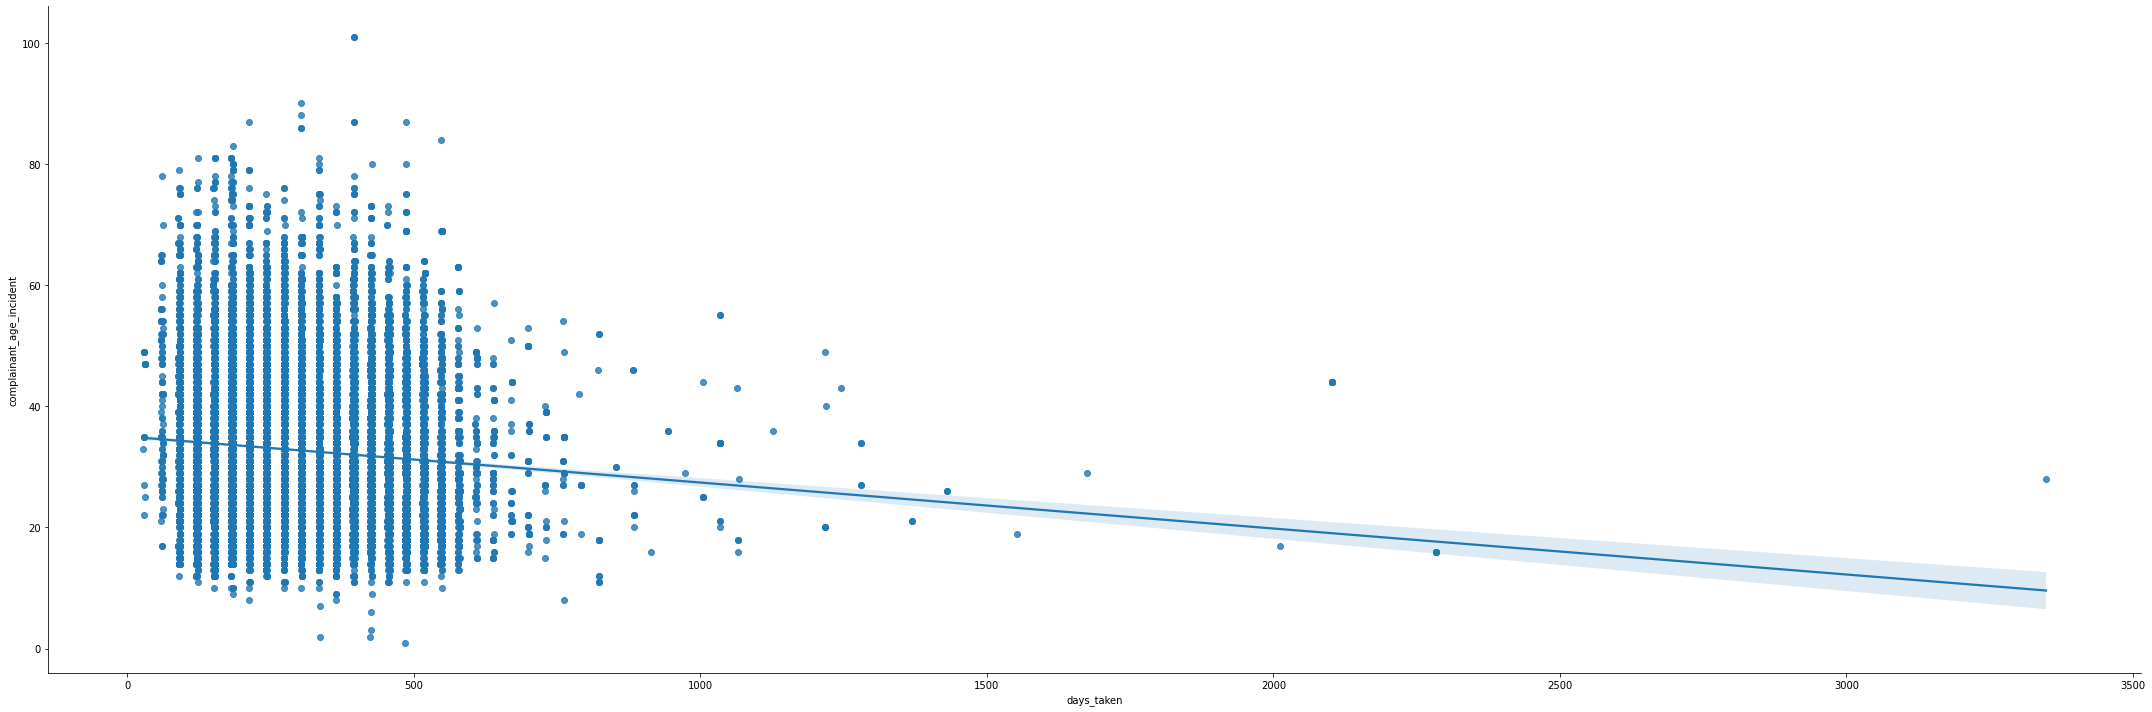

In [268]:
sns.lmplot(data = complaints, x = "days_taken", y = 'complainant_age_incident', height = 10, aspect = 3)
print("Correlation between duration of complaint and age of complainant: {}".format(complaints.corr().loc['days_taken', 'complainant_age_incident']))

### Now, let's clean up the qualitative columns by detailing a course of action for each qualitative column:

In [269]:
complaints.nunique()

unique_mos_id                3996
first_name                   1217
last_name                    2835
command_now                   415
shield_no                    3334
complaint_id                12052
command_at_incident           361
rank_abbrev_incident           18
rank_abbrev_now                20
rank_now                        8
rank_incident                   8
mos_ethnicity                   5
mos_gender                      2
mos_age_incident               40
complainant_ethnicity           8
complainant_gender              6
complainant_age_incident       86
fado_type                       4
allegation                    115
precinct                       79
contact_reason                 53
outcome_description            23
board_disposition              11
date_received                 390
date_closed                   385
days_taken                    132
dtype: int64

- unique_mos_id, first_name, last_name, command_now, shield_no, complaint_id, contact_reason, allegation, and command_at_incident all contain hundreds if not thousands of unique values that, for simplicity's sake, will be left alone
- rank_abbrev_incident and rank_abbrev_now have more unique values than rank_now and rank_incident so we can convert these abbreviations to achieve higher granularity in our dataset
- mos_ethnicity, mos_gender, complainant_ethnicity, complainant_gender, fado_type, board_disposition, precinct, and outcome_description can be manually checked for inconsistencies and cleaned accordingly due to their limited diversity

Let's first start with enhancing granularity by converting abbreviations into full ranks. We can achieve this by joining `police_abbrev` with our original dataset.

In [270]:
display(police_abbrev.head())

,Abbreviation,Rank
0,POM,Police Officer
1,POF,Police Officer
2,PO,Police Officer
3,PSA,Police Officer Special Assignment
4,SGT,Sergeant


In [271]:
def convert_abbrev(police_abbrev, complaints):
    merged = complaints.merge(police_abbrev, how='inner', left_on=['rank_abbrev_incident'], right_on =['Abbreviation']).merge(police_abbrev, how = 'inner', left_on=['rank_abbrev_now'], right_on=['Abbreviation'], suffixes=("_incident", "_now")).drop(columns = ['rank_abbrev_incident', 'rank_abbrev_now', 'rank_now', 'rank_incident', 'Abbreviation_incident', 'Abbreviation_now'])
    return merged

merged_complaints = convert_abbrev(police_abbrev, complaints)
merged_complaints[['Rank_incident', 'Rank_now']].nunique()

Rank_incident    15
Rank_now         18
dtype: int64

Now, let's manually sift through features that have a low amount of unique values and look for inconsistencies.

In [272]:
small_qualitative_features = ['mos_ethnicity', 'mos_gender', 'complainant_ethnicity', 'complainant_gender', 'fado_type', 'board_disposition', 'precinct', 'outcome_description']
for feature in small_qualitative_features:
    print("{}'s unique values are: {}".format(feature, merged_complaints[feature].unique()), end='\n\n')

mos_ethnicity's unique values are: ['Hispanic' 'White' 'Asian' 'Black' 'American Indian']

mos_gender's unique values are: ['M' 'F']

complainant_ethnicity's unique values are: ['Black' 'White' 'Asian' 'Refused' 'Hispanic' 'Other Race' nan 'Unknown'
 'American Indian']

complainant_gender's unique values are: ['Female' 'Male' nan 'Transman (FTM)' 'Not described' 'Transwoman (MTF)'
 'Gender non-conforming']

fado_type's unique values are: ['Abuse of Authority' 'Discourtesy' 'Offensive Language' 'Force']

board_disposition's unique values are: ['Substantiated (Command Lvl Instructions)' 'Substantiated (Charges)'
 'Substantiated (Formalized Training)' 'Unsubstantiated'
 'Substantiated (Command Discipline A)' 'Exonerated'
 'Substantiated (Command Discipline B)'
 'Substantiated (Command Discipline)' 'Substantiated (Instructions)'
 'Substantiated (No Recommendations)' 'Substantiated (MOS Unidentified)']

precinct's unique values are: [  78.   67.   10.   79.   90.   46.    9.   28.  120.   6

- complainant_ethnicity and complainant_gender have vague values that should be represented with `np.nan`
- New York contains precincts between 1 and 123, and so any precincts outside of that range should be represented with `np.nan`

In [273]:
def replace_with_nan(complaints):
    columns_to_clean = ['complainant_ethnicity', 'complainant_gender', 'precinct']
    replaced_with_nan = complaints.assign(complainant_ethnicity = complaints['complainant_ethnicity'].replace({"Refused": np.nan, 'Unknown': np.nan, 'Other Race': np.nan})).assign(complainant_gender = complaints['complainant_gender'].replace({'Not described': np.nan}))
    replaced_with_nan[(replaced_with_nan['precinct'] > 123) | (replaced_with_nan['precinct'] <= 0)] = np.nan
    for column in columns_to_clean:
        print("{}'s unique values are: {}".format(column, replaced_with_nan[column].unique()), end='\n\n')
    return replaced_with_nan

cleaned_nan = replace_with_nan(merged_complaints)

complainant_ethnicity's unique values are: ['Black' 'White' 'Asian' nan 'Hispanic' 'American Indian']

complainant_gender's unique values are: ['Female' 'Male' nan 'Transman (FTM)' 'Transwoman (MTF)'
 'Gender non-conforming']

precinct's unique values are: [ 78.  67.  10.  79.  90.  46.   9.  28. 120.  68.  70.  72. 122. 100.
   1.   7.  81.  63.  52.  47.  83.  42.  84.  73.  13.   5.  88.  77.
  75.  94.  40.  18.  69. 101. 110. 103. 102.  62.  25. 104. 105. 106.
 113.  17.  34. 107. 108. 109. 115.  19. 112.  43. 111.  32.  71.  14.
  60. 114.  26.  20.  61.   6.  48. 121.  66. 123.  30.  41.  50.  49.
  44.  45.  23.  22.  nan  33.  24.  76.]



In [274]:
cleaned_nan

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,command_at_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,date_received,date_closed,days_taken,Rank_incident,Rank_now
0,10004.0,Jonathan,Ruiz,078 PCT,8409.0,42835.0,078 PCT,Hispanic,M,32.0,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305.0,Police Officer,Police Officer
1,10007.0,John,Sears,078 PCT,5952.0,24601.0,PBBS,White,M,24.0,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274.0,Police Officer,Police Officer
2,10007.0,John,Sears,078 PCT,5952.0,24601.0,PBBS,White,M,24.0,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274.0,Police Officer,Police Officer
3,10007.0,John,Sears,078 PCT,5952.0,26146.0,PBBS,White,M,25.0,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2012-07-01,2013-09-01,427.0,Police Officer,Police Officer
4,10014.0,Malachy,Sullivan,078 PCT,4143.0,33969.0,078 PCT,White,M,43.0,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),2015-11-01,2016-02-01,92.0,Police Officer,Police Officer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33276,22635.0,Thomas,Galati,INT BUR,0.0,4862.0,047 PCT,White,M,36.0,Black,Male,24.0,Abuse of Authority,Frisk and/or search,47.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,2001-05-01,2002-02-01,276.0,Captain,Chief of Intelligence
33277,22635.0,Thomas,Galati,INT BUR,0.0,4862.0,047 PCT,White,M,36.0,Black,Male,24.0,Abuse of Authority,Question and/or stop,47.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,2001-05-01,2002-02-01,276.0,Captain,Chief of Intelligence
33278,22635.0,Thomas,Galati,INT BUR,0.0,5409.0,047 PCT,White,M,37.0,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,47.0,Execution of search warrant,No arrest made or summons issued,Exonerated,2002-04-01,2003-05-01,395.0,Deputy Inspector,Chief of Intelligence
33279,22635.0,Thomas,Galati,INT BUR,0.0,5756.0,047 PCT,White,M,38.0,NaN,NaN,NaN,Abuse of Authority,Premises entered and/or searched,47.0,Other violation of VTL,No arrest made or summons issued,Exonerated,2002-08-01,2003-11-01,457.0,Deputy Inspector,Chief of Intelligence


Let's also drop unique_mos_id because shield_no already satisfies the need for a unique identifier.

In [275]:
columns_to_drop = ['unique_mos_id']
cleaned = cleaned_nan.drop(columns = columns_to_drop)
cleaned.head()

,first_name,last_name,command_now,shield_no,complaint_id,command_at_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,date_received,date_closed,days_taken,Rank_incident,Rank_now
0,Jonathan,Ruiz,078 PCT,8409.0,42835.0,078 PCT,Hispanic,M,32.0,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305.0,Police Officer,Police Officer
1,John,Sears,078 PCT,5952.0,24601.0,PBBS,White,M,24.0,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274.0,Police Officer,Police Officer
2,John,Sears,078 PCT,5952.0,24601.0,PBBS,White,M,24.0,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274.0,Police Officer,Police Officer
3,John,Sears,078 PCT,5952.0,26146.0,PBBS,White,M,25.0,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2012-07-01,2013-09-01,427.0,Police Officer,Police Officer
4,Malachy,Sullivan,078 PCT,4143.0,33969.0,078 PCT,White,M,43.0,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),2015-11-01,2016-02-01,92.0,Police Officer,Police Officer


### Time for explatory data analysis:

Let's begin with plotting age distributions of both police officers and complainants.

In [276]:
cleaned['mos_age_incident']

0        32.0
1        24.0
2        24.0
3        25.0
4        43.0
         ... 
33276    36.0
33277    36.0
33278    37.0
33279    38.0
33280    38.0
Name: mos_age_incident, Length: 33281, dtype: float64